
## Деревья решений, случайный лес

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Classify leaf with random forest

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Помните [Iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)? Данные, с которыми вам предстоит работать в этом задании концептуально похожи на ирисы.

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

## Табличные данные

Загрузите файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить многомерный numpy массив

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
random_seed = 123

In [7]:
LE = LabelEncoder()

In [8]:
y = LE.fit_transform(table_data.species)

In [9]:
type(y)

numpy.ndarray

In [10]:
X = np.array(table_data.loc[:,'margin1'::])

In [11]:
type(X)

numpy.ndarray

* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
SSS = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=123)

In [14]:
for train_index,test_index in SSS.split(X,y):
    train_idx = train_index
    test_idx = test_index


## Сравнение RF, DT и Bagging'а (2 балла)

На кросс-валидации по обучающей выборке сравните качество и скорость
1. Обычного дерева решений 
2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями


* Изобразите полученные результаты на одном графике
* Используйте `StratifiedKFold` с 4 фолдами для оценки качества
* Мера качества - `accuracy`

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [16]:
X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

In [17]:
X_train.shape

(792, 192)

In [18]:
SKF = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

###  Decision Tree

In [19]:
def score_model(type_of_model, X, y):
    scores = []
    for train, test in SKF.split(X, y):
        type_of_model.fit(X[train], y[train])
        y_hat = type_of_model.predict(X[test])
        scores.append(accuracy_score(y[test], y_hat))
    return scores

In [20]:
DTC = DecisionTreeClassifier(random_state=123)

In [21]:
%%time
scores_DTC = []
scores_DTC = score_model(DTC,X_train,y_train)

Wall time: 949 ms


In [22]:
scores_DTC = []
scores_DTC = score_model(DTC,X_train,y_train)
scores_DTC

[0.59595959595959591,
 0.60101010101010099,
 0.6262626262626263,
 0.63131313131313127]

Validation score: 0.613636363636


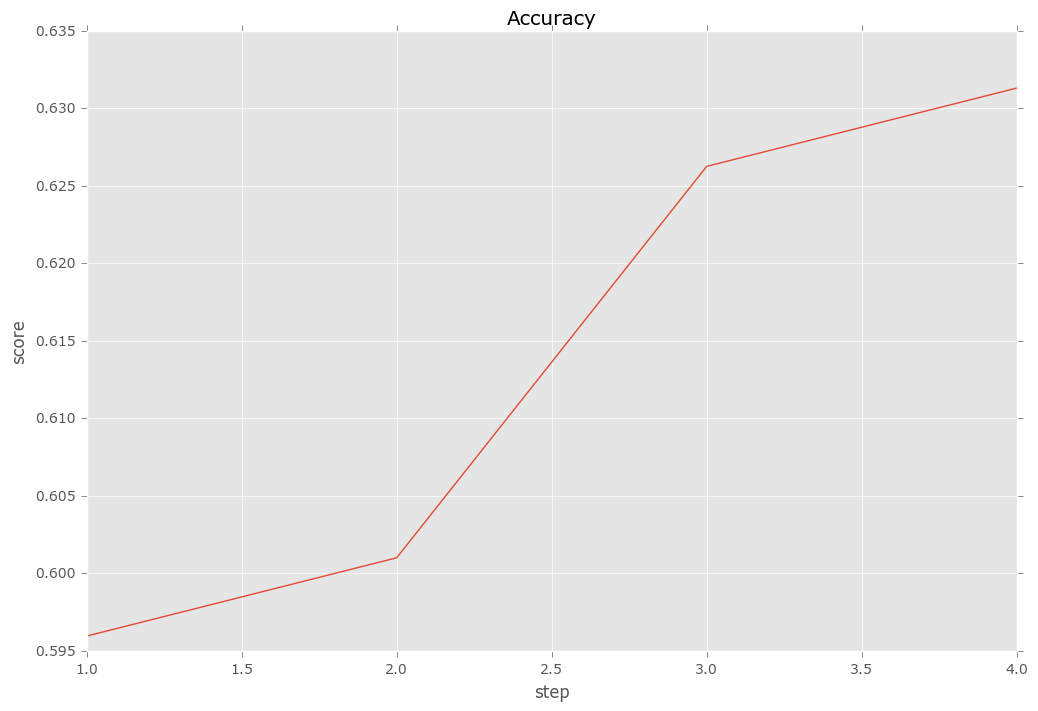

In [23]:
points_DTC = []
for i in scores_DTC:
    points_DTC.append(np.mean(i))
p = np.arange(1,5)
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('step')
print('Validation score:', np.mean(points_DTC))
plt.plot(p, scores_DTC)

### BaggingClassifier

In [24]:
%%time
scores_BC = []
for amount in[10,50,100,200,300]:
    BC = BaggingClassifier(n_estimators=amount,random_state=123)
    scores_BC.append(score_model(BC,X_train,y_train))

Wall time: 8min 44s


In [25]:
scores_BC = []
for amount in[10,50,100,200,300]:
    BC = BaggingClassifier(n_estimators=amount,random_state=123)
    scores_BC.append(score_model(BC,X_train,y_train))
scores_BC

[[0.77777777777777779,
  0.84343434343434343,
  0.78787878787878785,
  0.79292929292929293],
 [0.90909090909090906,
  0.9242424242424242,
  0.90404040404040409,
  0.91919191919191923],
 [0.92929292929292928,
  0.94444444444444442,
  0.91919191919191923,
  0.93434343434343436],
 [0.93939393939393945,
  0.9747474747474747,
  0.9242424242424242,
  0.94444444444444442],
 [0.94444444444444442,
  0.95454545454545459,
  0.91919191919191923,
  0.95454545454545459]]

Best score: 0.945707070707


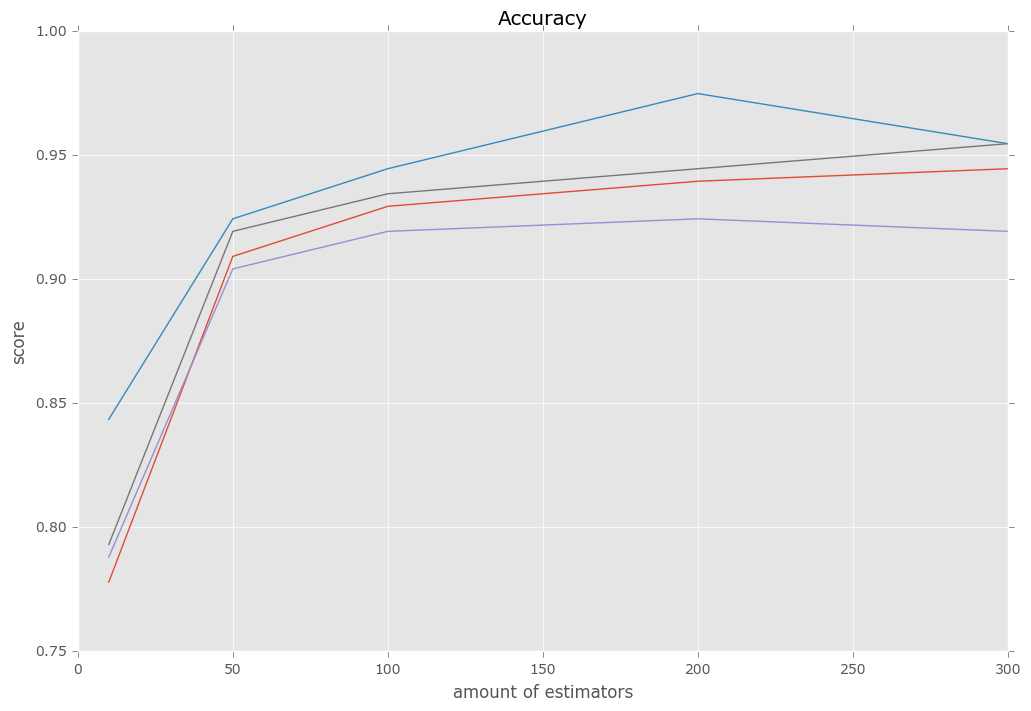

In [26]:
points_BC = []
for i in scores_BC:
    points_BC.append(np.mean(i))
p = [10, 50, 100, 200, 300]
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('amount of estimators')
print('Best score:', max(points_BC))
plt.plot(p, scores_BC)

### RandomForestClassifier

In [27]:
%%time
scores_RFC = []
for amount in[10,50,100,200,300]:
    RFC = RandomForestClassifier(n_estimators=amount,random_state=123)
    scores_RFC.append(score_model(RFC,X_train,y_train))

Wall time: 27.8 s


In [28]:
scores_RFC = []
for amount in[10,50,100,200,300]:
    RFC = RandomForestClassifier(n_estimators=amount,random_state=123)
    scores_RFC.append(score_model(RFC,X_train,y_train))
scores_RFC

[[0.83838383838383834,
  0.84343434343434343,
  0.8232323232323232,
  0.84343434343434343],
 [0.96969696969696972,
  0.98484848484848486,
  0.9494949494949495,
  0.95959595959595956],
 [0.97979797979797978,
  0.98989898989898994,
  0.95454545454545459,
  0.95454545454545459],
 [0.98484848484848486,
  0.98989898989898994,
  0.96464646464646464,
  0.95959595959595956],
 [0.98989898989898994,
  0.98989898989898994,
  0.96464646464646464,
  0.96969696969696972]]

Best score: 0.978535353535


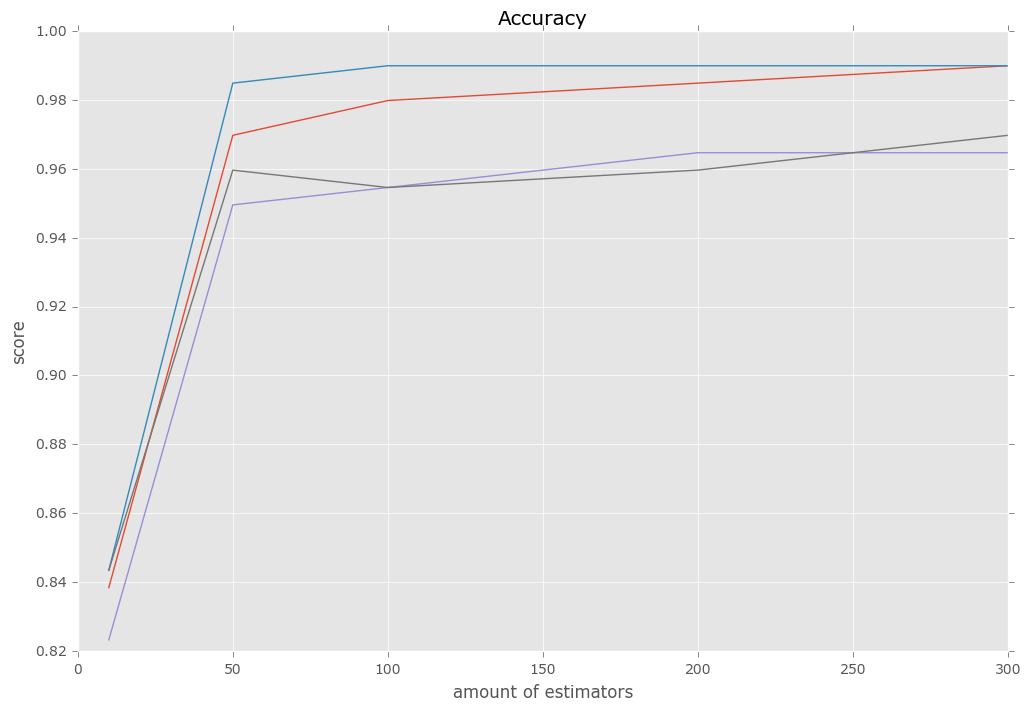

In [29]:
points_RFC = []
for i in scores_RFC:
    points_RFC.append(np.mean(i))
p = [10, 50, 100, 200, 300]
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('amount of estimators')
print('Best score:', max(points_RFC))
plt.plot(p, scores_RFC)

# Изображения листьев

В папке `images` лежат 1584 изображения различного размера, названные в соответствии с id из файла `table_data.csv`.

In [30]:
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

In [31]:
img.shape

(357, 700)

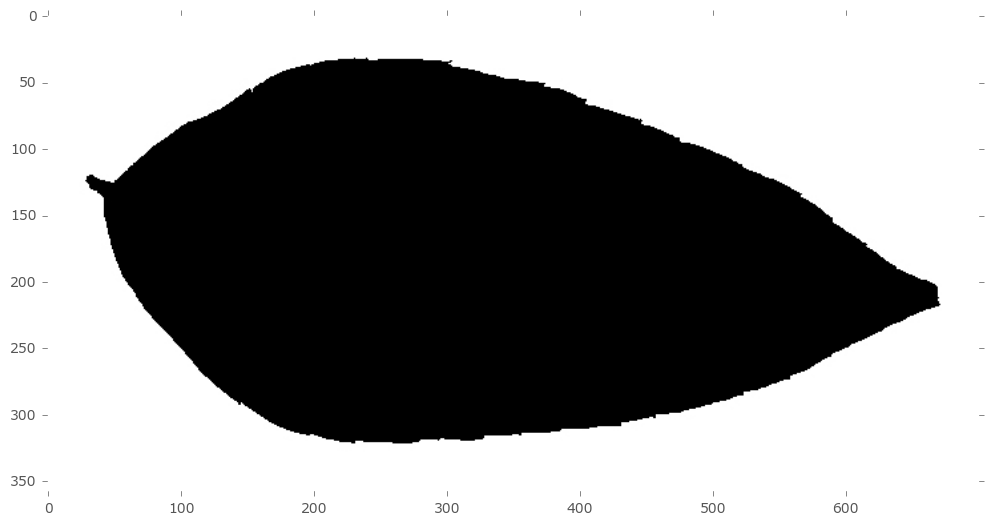

In [32]:
plt.imshow(img, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балла)

Необходимо
1. "Стандартизировать" размер изображений - сделать его одинаковым для всех
2. Отобрать изображения тех листьев, которые представлены в `table_data`

Пункт 1. можно сделать двумя способами:
* C помощью функции scipy.misc.imresize (неидеальный вариант)
* Найти максимальные длинну и ширину полотна и перенести исходные картинки в центр (кажется, что так лучше)

В результате этого задания вы должны получить получить массив изображений IMG_train и IMG_test для обучающей и контрольной выборки.

In [33]:
from scipy.misc import imresize

In [34]:
img_resized = imresize(img, (100, 100))

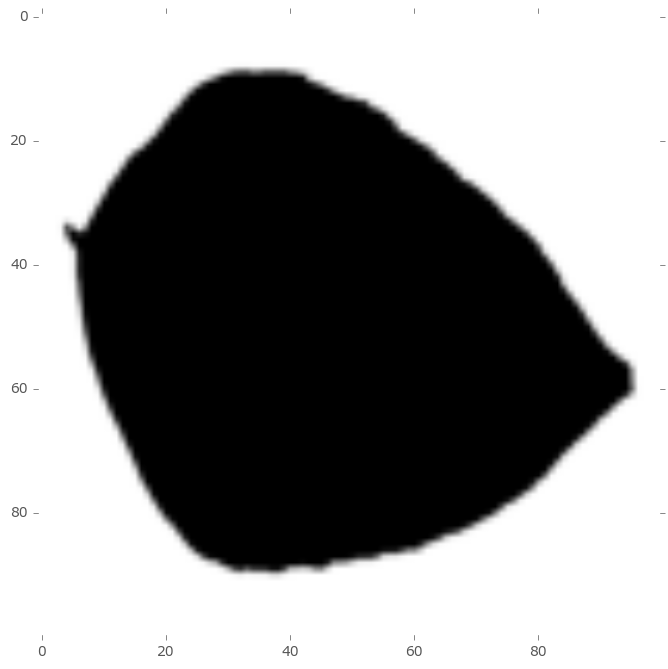

In [35]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

In [36]:
IMG_data = []
for i in range(1, 1585):
    if np.any(table_data['id'] == i):
        filepath = os.path.join(IMG_DIR, str(i) + '.jpg')
        img = plt.imread(filepath)
        IMG_data.append(imresize(img, (150, 225)))
IMG_data = np.array(IMG_data)

In [37]:
X_IMG_train = IMG_data[train_idx]
y_IMG_train = y[train_idx]
X_IMG_test = IMG_data[test_idx]
y_IMG_test = y[test_idx]
X_IMG_train.shape

(792, 150, 225)

## TSNE (2 балла)

* Переформатируйте IMG_train и IMG_test к виду "матрица объект-признак" (команда reshape)
* На данных в X_train и IMG_train (по отдельности) изобразите результат применения T-SNE со следующими настройками: `n_components=2, perplexity=[5,10,20,30,50], method='exact', n_iter=5000, learning_rate=500`. 
* У вас должно получится 10 `scatter-plot` графиков с точками, расскашенными в цвет своего класса (для наглядности в `plt.scatter` укажите `cmap=plt.cm.Paired`)
* В каком случае (X_train или IMG_train) кластеры выделяются лучше? Как вы думаете, почему?


In [38]:
from sklearn.manifold import TSNE

In [39]:
X_IMG_train = X_IMG_train.reshape((X_IMG_train.shape[0], 150 * 225))
X_IMG_test = X_IMG_test.reshape((X_IMG_test.shape[0], 150 * 225))
X_IMG_train.shape

(792, 33750)

In [40]:
means_X = []
for p in [5,10,20,30,50]:
    tsne = TSNE(n_components=2, perplexity=p, method='exact', n_iter=5000, learning_rate=500, random_state=123)
    means_X.append(tsne.fit_transform(X_train))

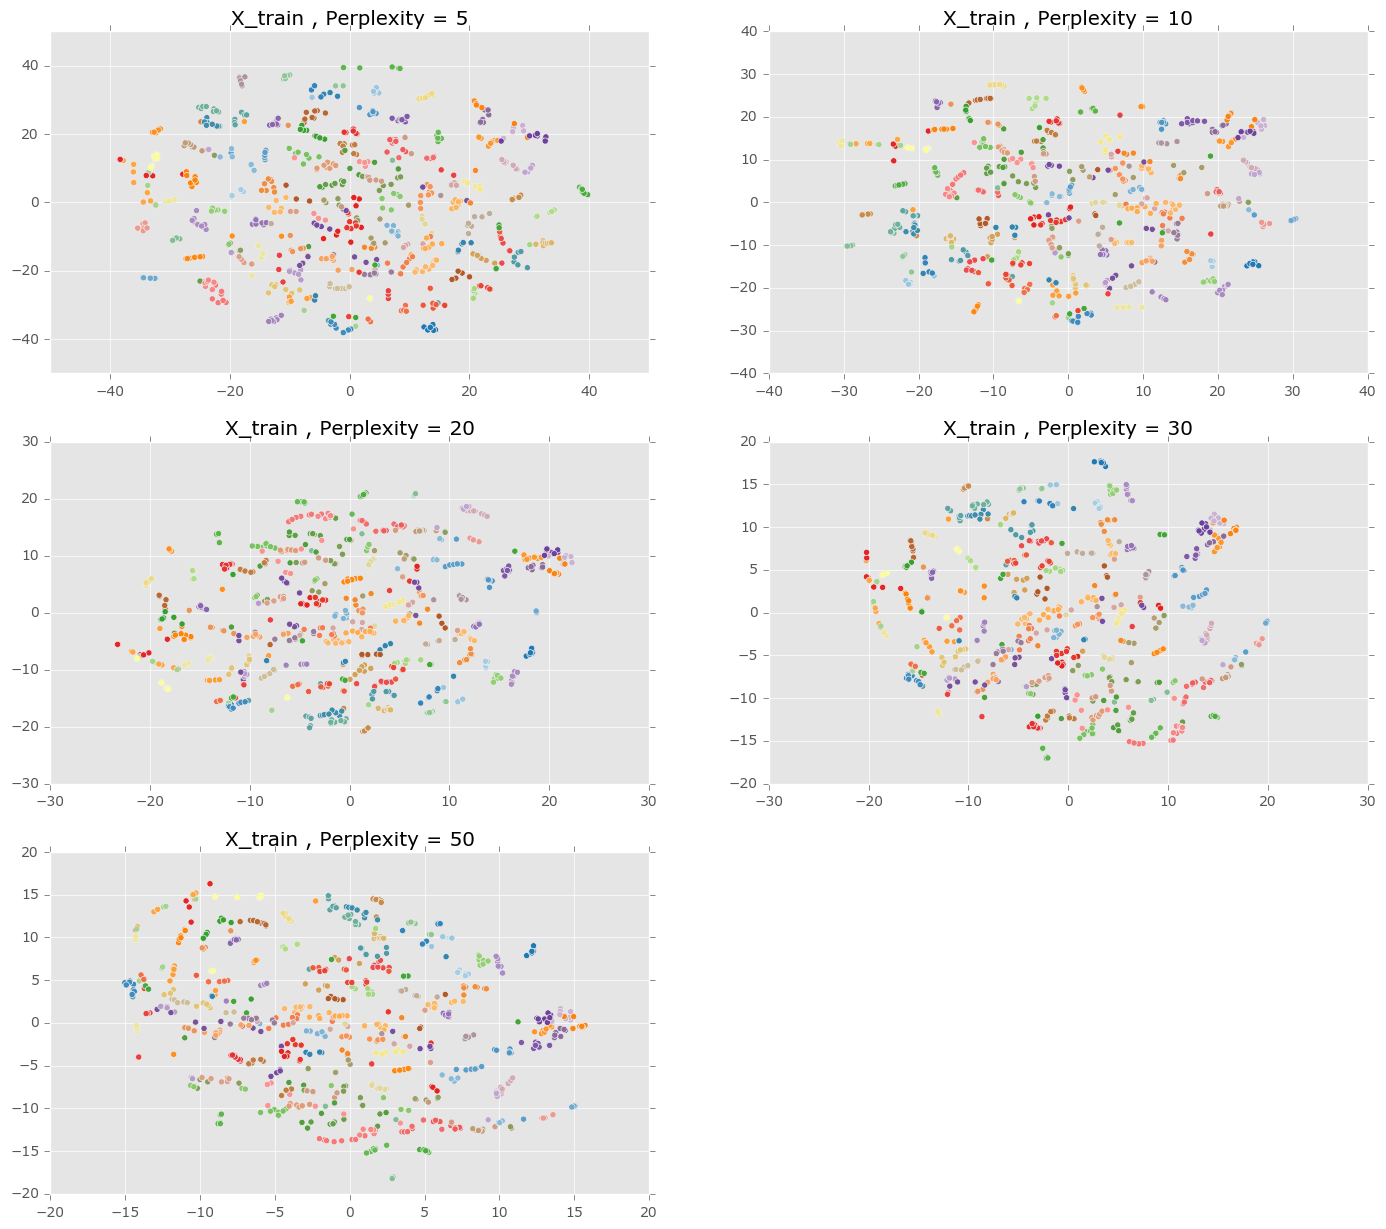

In [41]:
fig = plt.figure(figsize=(17,15))
mean_ax_X = []
for i in range(0, 5):
    mean_ax_X.append(fig.add_subplot(3, 2, i + 1))
    mean_ax_X[i].set_title('X_train , Perplexity = {}'.format([5,10,20,30,50][i]))
    mean_ax_X[i].scatter(means_X[i][:,0], means_X[i][:,1], cmap = plt.cm.Paired, c = y_train)
    

In [42]:
means_IMG = []
for p in [5,10,20,30,50]:
    tsne = TSNE(n_components=2, perplexity=p, method='exact', n_iter=5000, learning_rate=500, random_state=123)
    means_IMG.append(tsne.fit_transform(X_IMG_train))

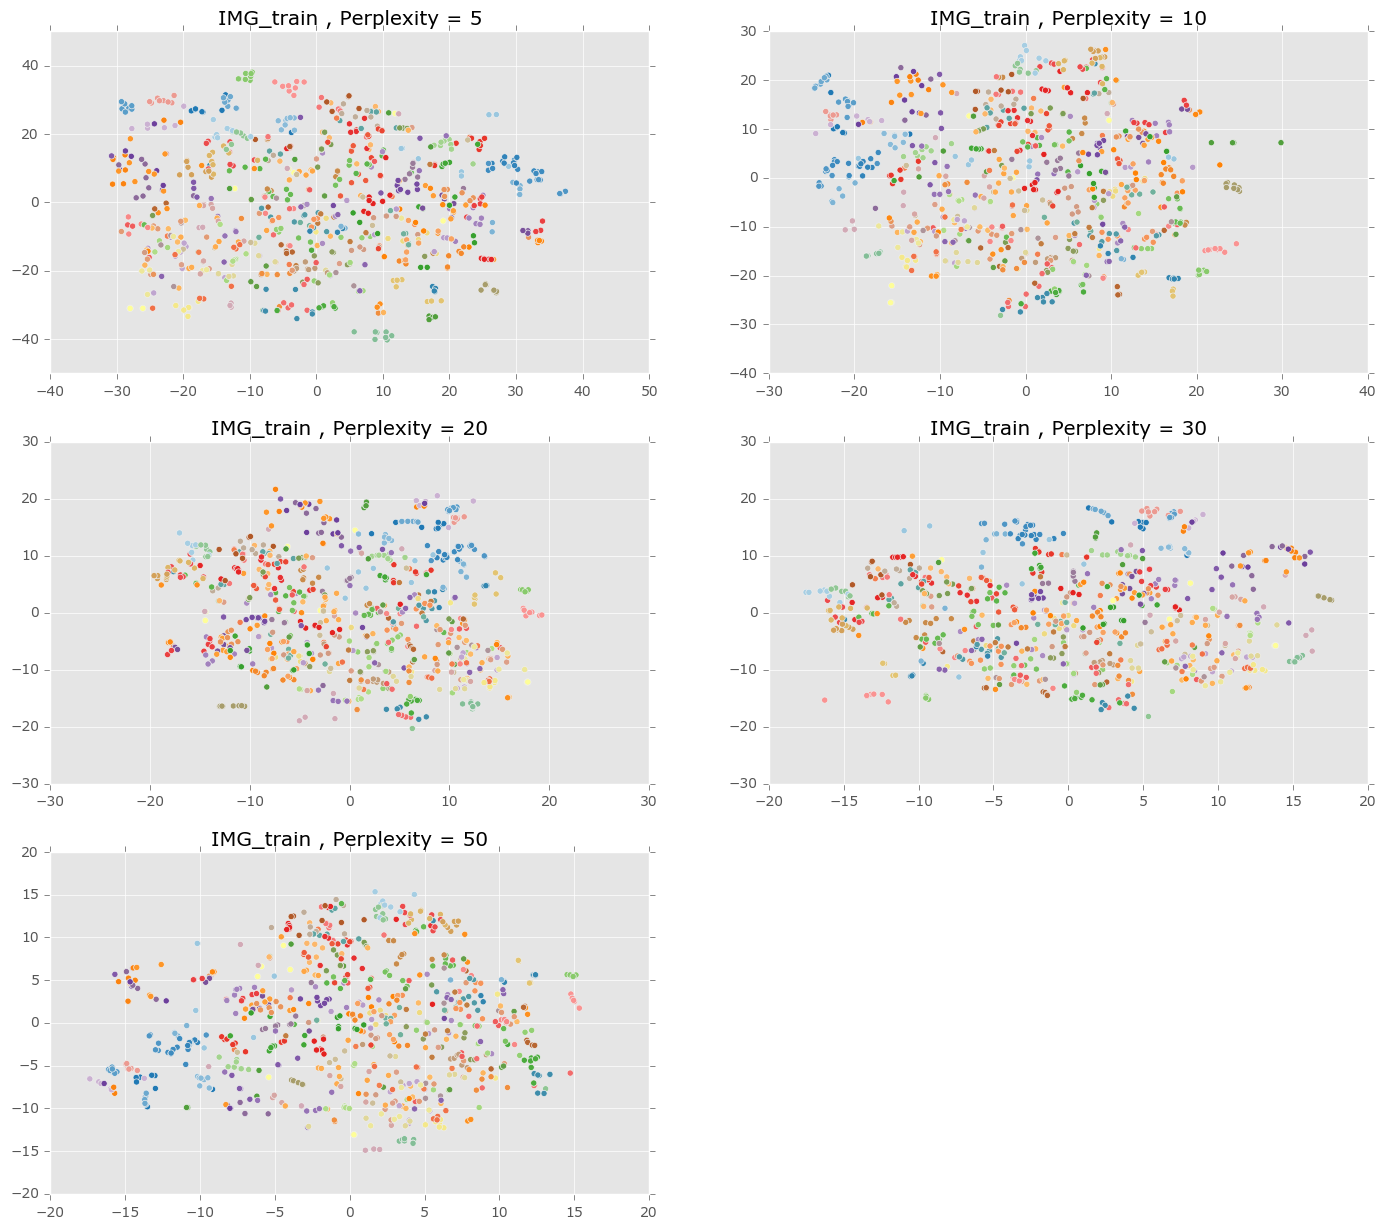

In [43]:
fig = plt.figure(figsize=(17,15))
mean_ax_IMG = []
for i in range(0, 5):
    mean_ax_IMG.append(fig.add_subplot(3, 2, i + 1))
    mean_ax_IMG[i].set_title('IMG_train , Perplexity = {}'.format([5,10,20,30,50][i]))
    mean_ax_IMG[i].scatter(means_IMG[i][:,0], means_IMG[i][:,1],cmap=plt.cm.Paired,c = y_IMG_train)

Кластеры выделяются лучше для X_train, так как размерность объектов меньше.

## PCA (1 балл)

* Используйте метод главных компонент, чтобы перейти к пространству меньшей размерности. Подберите количество компонент так, чтобы доля объясненной дисперсии составляла 60%
* Используя результаты МГК на кросс-валидации сравните качество
    1. Обычного дерева решений 
    2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
    3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями
    
#### Hint
Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) из PCA и предиктивной модели

In [44]:
pca_IMG_score = []
number = np.arange(1,26)
for i in number:
    pca = PCA(n_components=i, random_state=123)
    pca.fit(X_IMG_train)
    pca_IMG_score.append(sum(pca.explained_variance_ratio_))

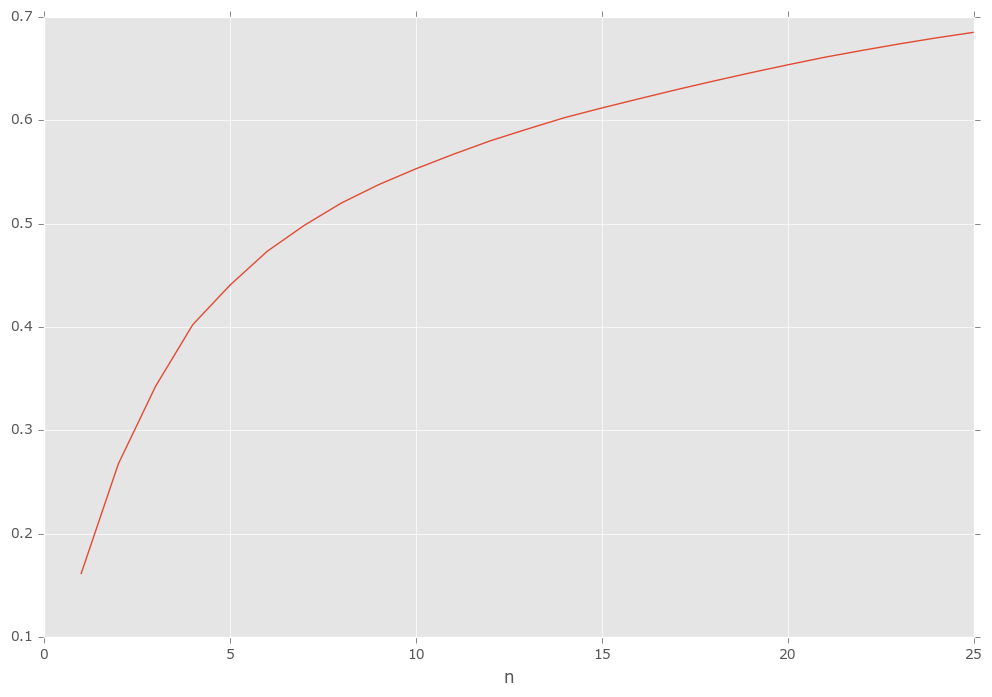

In [45]:
plt.plot(number, pca_IMG_score)
plt.xlabel('n')

In [46]:
for i, score in enumerate(pca_IMG_score):
    if score > 0.6:
        print('For')
        print((i+1), 'components')
        print('Result is more than 60%')
        break

For
14 components
Result is more than 60%


### Decision tree

In [47]:
pca = PCA(n_components=14,random_state=123)
X_IMG_train = pca.fit_transform(X_IMG_train)

In [48]:
X_IMG_train

array([[-5815.12050013, -5261.43713048,   687.32137945, ...,
          -42.20697609,  1647.61781386,   987.34848647],
       [-2141.7671319 , -4968.21040626,  -232.65914072, ...,
          382.21554656,   515.76730762,  1154.51519106],
       [ 5503.47025435, -2419.73418829, -2838.84993771, ...,
          243.36257973,  1609.32269333,  -367.2401176 ],
       ..., 
       [-1693.85783801,  1844.22325928,  6091.31921339, ...,
        -1114.09317233,  -965.21242755,  1343.82800025],
       [-5097.69235137,   996.61625366,  2657.75685694, ...,
         -672.30336619,  2103.80946936,  -195.17501316],
       [ 1109.13373338, -4275.26137826, -3805.88717442, ...,
         1525.03674914,  -699.32959396,  1381.25936551]])

In [49]:
def score_pca(type_of_model, X, y):
    scores = []
    for train, test in SKF.split(X, y):
        type_of_model.fit(X[train], y[train])
        y_hat = type_of_model.predict(X[test])
        scores.append(accuracy_score(y[test], y_hat))
    return scores

In [50]:
DTC_pca = DecisionTreeClassifier(random_state=123)

In [51]:
scores_DTC_pca = []
scores_DTC_pca = score_pca(DTC_pca,X_IMG_train,y_train)
scores_DTC_pca

[0.31818181818181818,
 0.30808080808080807,
 0.2878787878787879,
 0.29292929292929293]

Score: 0.301767676768


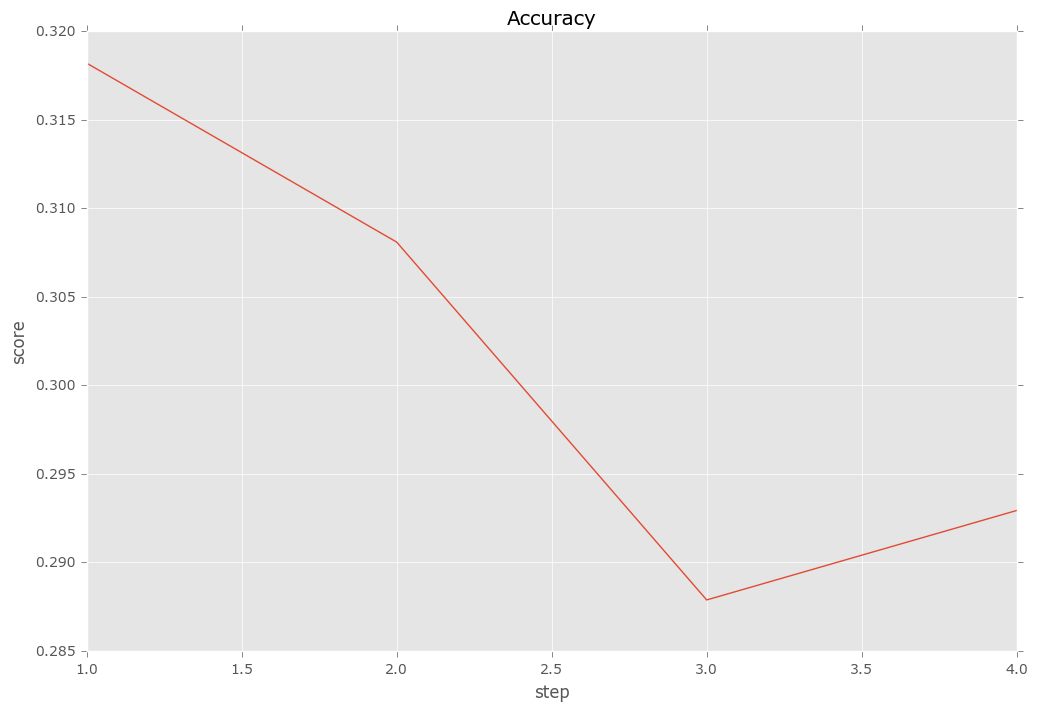

In [52]:
points_DTC = []
for i in scores_DTC_pca:
    points_DTC.append(np.mean(i))
p = np.arange(1,5)
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('step')
print('Score:', np.mean(points_DTC))
plt.plot(p, scores_DTC_pca)

### BagginClassifier

In [53]:
scores_BC_pca = []
for amount in[10,50,100,200,300]:
    BC = BaggingClassifier(n_estimators=amount,random_state=123)
    scores_BC_pca.append(score_pca(BC,X_IMG_train,y_train))
scores_BC_pca

[[0.41414141414141414,
  0.44444444444444442,
  0.3888888888888889,
  0.38383838383838381],
 [0.47979797979797978,
  0.47474747474747475,
  0.43939393939393939,
  0.44444444444444442],
 [0.51515151515151514,
  0.48989898989898989,
  0.44444444444444442,
  0.46969696969696972],
 [0.5, 0.47474747474747475, 0.44444444444444442, 0.45454545454545453],
 [0.5, 0.49494949494949497, 0.43939393939393939, 0.48484848484848486]]

Best score: 0.479797979798


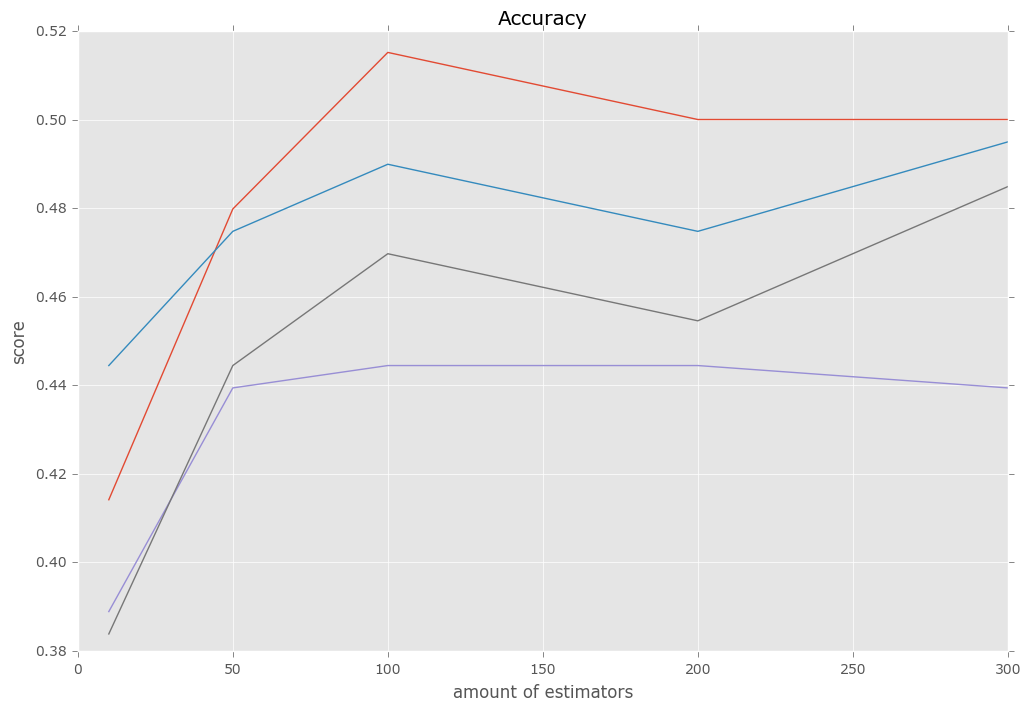

In [54]:
points_BC_pca = []
for i in scores_BC_pca:
    points_BC_pca.append(np.mean(i))
p = [10, 50, 100, 200, 300]
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('amount of estimators')
print('Best score:', max(points_BC_pca))
plt.plot(p, scores_BC_pca)

### RandomForestClassifier

In [55]:
scores_RFC_pca = []
for amount in[10,50,100,200,300]:
    RFC = RandomForestClassifier(n_estimators=amount,random_state=123)
    scores_RFC_pca.append(score_pca(RFC,X_IMG_train,y_train))
scores_RFC_pca

[[0.40909090909090912,
  0.3888888888888889,
  0.39393939393939392,
  0.39393939393939392],
 [0.48484848484848486,
  0.45959595959595961,
  0.46969696969696972,
  0.47979797979797978],
 [0.49494949494949497,
  0.51515151515151514,
  0.46969696969696972,
  0.48989898989898989],
 [0.51515151515151514,
  0.53535353535353536,
  0.48989898989898989,
  0.48989898989898989],
 [0.51515151515151514,
  0.52020202020202022,
  0.48484848484848486,
  0.50505050505050508]]

Best score: 0.507575757576


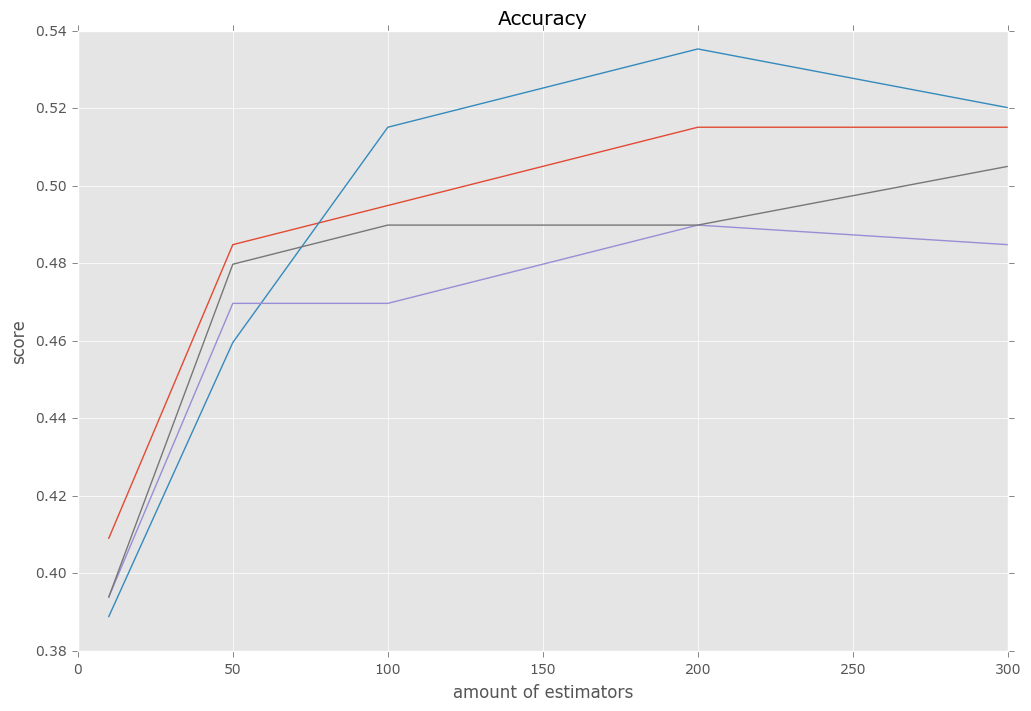

In [56]:
points_RFC_pca = []
for i in scores_RFC_pca:
    points_RFC_pca.append(np.mean(i))
p = [10, 50, 100, 200, 300]
plt.title('Accuracy')
plt.ylabel('score')
plt.xlabel('amount of estimators')
print('Best score:', max(points_RFC_pca))
plt.plot(p, scores_RFC_pca)

При пременении PCA качество падает, лучшим оказался RandomForestClassifier

# Подбор гиперпараметров модели на табличных данных (2 балла)

С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах
* Мера качества - `accuracy`

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [58]:
SKF_GS = StratifiedKFold(n_splits=4,shuffle=True,random_state=123)

In [59]:
p = {'n_estimators' : [10, 50, 100, 200, 300], 'max_depth' : np.arange(1,15,2)}
GSCV_scores = []
GSCV = GridSearchCV(RandomForestClassifier(random_state=123),scoring=make_scorer(accuracy_score, greater_is_better=True),
                      param_grid=p, cv = SKF_GS)

In [60]:
for train, test in SKF.split(X_train, y_train):
    GSCV.fit(X_train[train], y_train[train])
    GSCV_scores.append(GSCV.score(X_train[test], y_train[test]))

In [61]:
GSCV.best_params_

{'max_depth': 13, 'n_estimators': 300}

In [62]:
result = GSCV.cv_results_

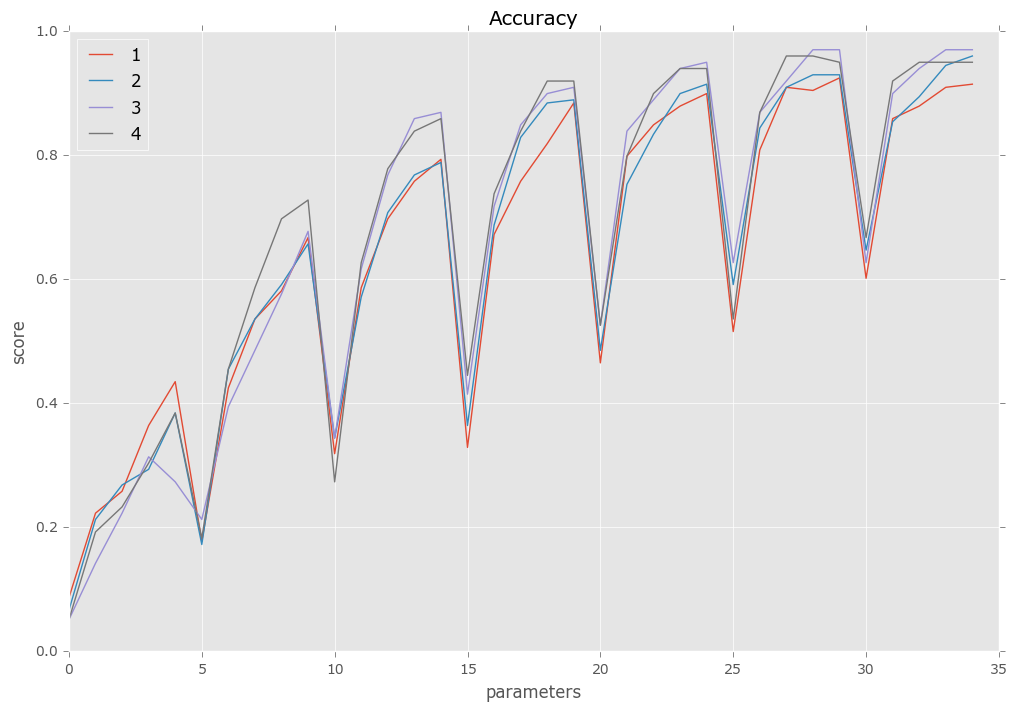

In [63]:
plt.figure()
for i in range(0,4):
    plt.plot(result['split' + str(i) + '_test_score'],label = str(i+1))
plt.legend(loc = 'upper left')
plt.xlabel('parameters')
plt.ylabel('score')
plt.title('Accuracy')


# Проверка на контрольной выборке (1 балл)

* Примените оптимальную модель на контрольной выборке
* Для нескольких случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса

In [64]:
RFC_test = RandomForestClassifier(n_estimators=300,max_depth=13,random_state=123)

In [65]:
RFC_test.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [66]:
y_hat = RFC_test.predict(X_test)
accuracy_score(y_test,y_hat)

0.95454545454545459

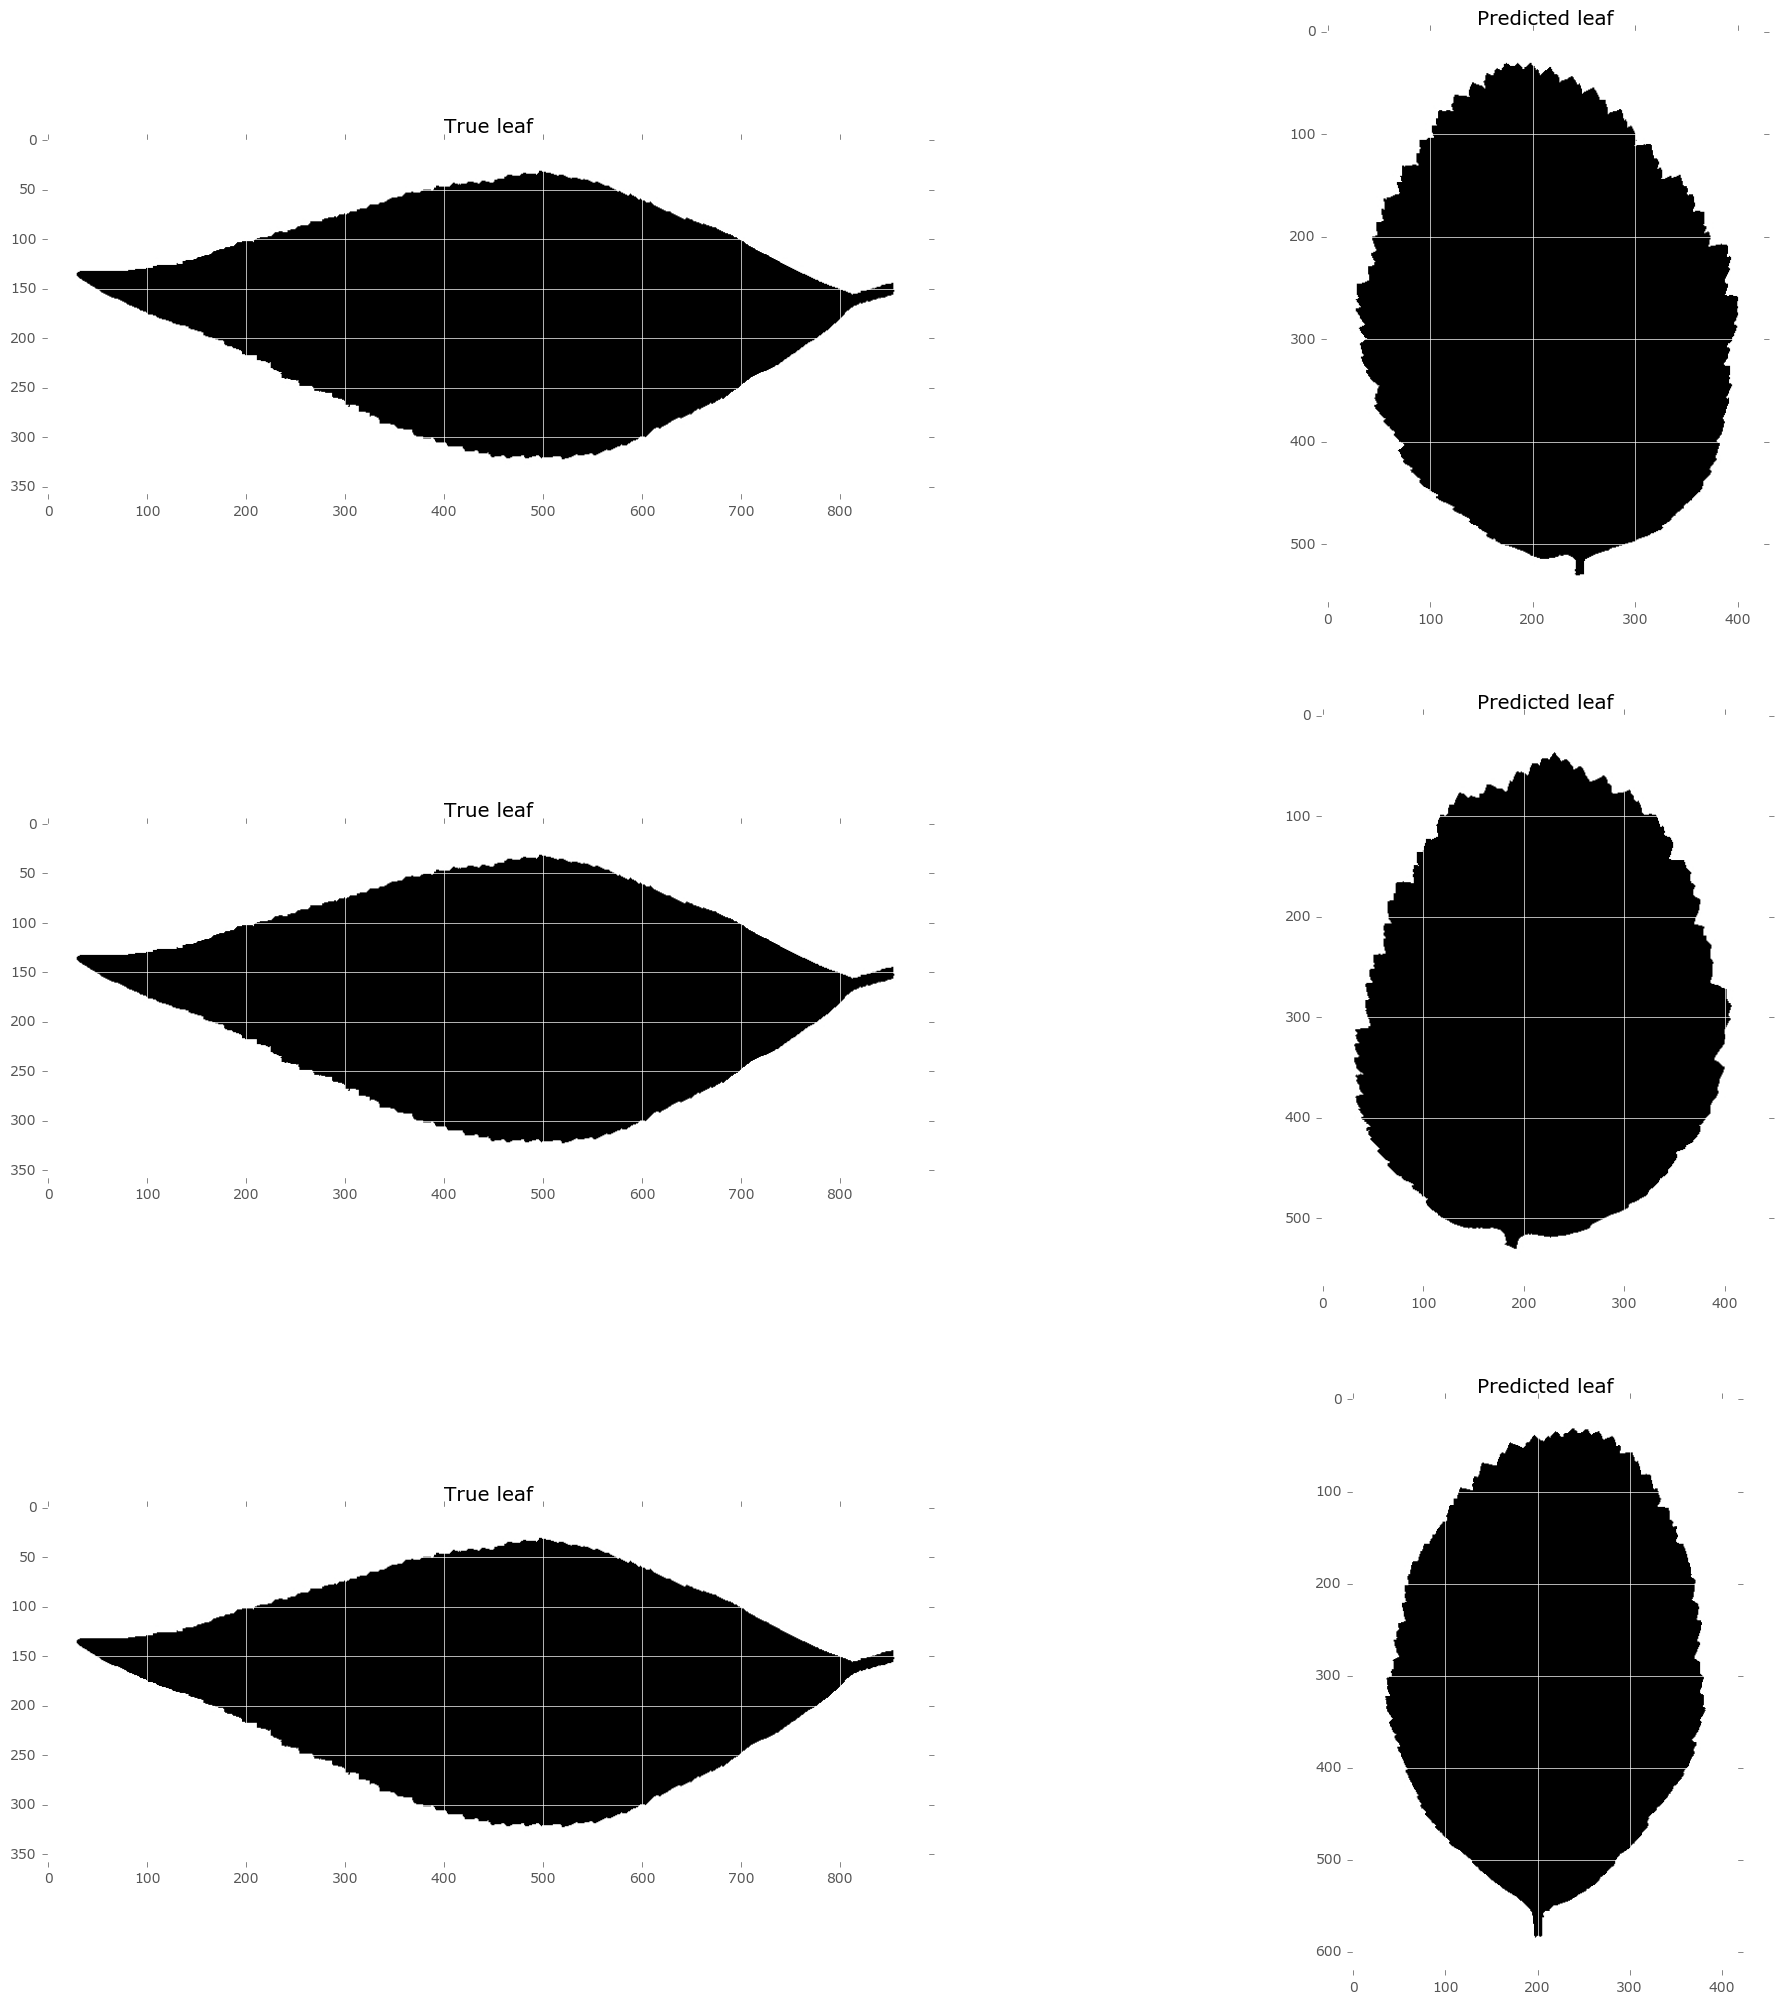

In [68]:
leafs = []
prove = plt.figure(figsize=(25,25))
number = 0
n = 0
for i, leaf in enumerate(y_test):
    if y_hat[i] != leaf:
        for j, f_leaf in enumerate(y):
            if y_hat[i] == f_leaf:    
                number += 1
                if number<=3:
                    k = n + number
                    k_2 = n + number + 1
                    leafs.append(prove.add_subplot(3,2,k))
                    leafs[k-1].imshow(plt.imread(os.path.join(IMG_DIR, '{}.jpg'.format( table_data['id'][test_idx[i]]))),cmap = 'Greys')
                    leafs[k-1].set_title('True leaf')
                    leafs.append(prove.add_subplot(3,2,k_2))
                    leafs[k_2-1].imshow(plt.imread(os.path.join(IMG_DIR, '{}.jpg'.format(table_data['id'][j]))),cmap = 'Greys')
                    leafs[k_2-1].set_title('Predicted leaf')
                    n+=1
            
            

   

# Подбор гиперпараметров модели на объединенных данных (2 балла) **

За это задание можно получить 2 дополнительных балла, но сделать его надо безукоризненно =)

Сейчас мы попробуем использовать данные с изображений и табличные данные, которые затем пойдут на вход случайному лесу. Далее надо будет подобрать оптимальные гиперпараметры случайного леса с помощью кросс-валидации

## Объединяем данные

* Составьте матрицу A_train (A_test) как результаты конкатенации матриц X_train и IMG_train (X_test и IMG_test)

In [108]:
# Your Code Here

## Составим  Pipeline

Наш Pipeline условно изображен на рисунке ниже:

<center><img src='scheme.png'></center>


Из объединенных данных в матрице `А` 
1. Выбираются столбцы, которые относятся к изображению и передаются в `PCA`
2. Исходные табличные данные отделяются от всех остальных, но остаются без изменений
3. Результаты пунктов 1 и 2 объединяются
4. И передаются на вход в случайный лес

В результате в переменную model вы должны записать весь Pipeline из шагов 1-4

#### Hints
* Для того, чтобы выбирать столбцы из матрицы `А` можно использовать `FunctionTransformer` (см. пример ниже)
* Для того, чтобы объединять результаты преобразований можно использовать [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [109]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

In [110]:
def select_col_idx(X, col_idx=[1]):
    return X[:, col_idx]

In [111]:
trans = FunctionTransformer(select_col_idx, kw_args={'col_idx': [2,3]})

In [112]:
trans.fit_transform(A_train)

array([[ 0.007812,  0.044922],
       [ 0.054688,  0.005859],
       [ 0.039062,  0.046875],
       ..., 
       [ 0.033203,  0.003906],
       [ 0.033203,  0.001953],
       [ 0.03125 ,  0.023438]])

In [141]:
# Your Code Here

## Проверка на контрольной выборке

* Примените оптимальную модель на контрольной выборке
* Сравните качество с моделью на табличных данных

In [ ]:
# Your Code Here